[*********************100%***********************]  1 of 1 completed
Points: [32.         32.66666667 33.33333333 34.         34.66666667 35.33333333
 36.         36.66666667 37.33333333 38.         38.66666667 39.33333333
 40.         40.66666667 41.33333333 42.         42.66666667 43.33333333
 44.         44.66666667 45.33333333 46.         46.66666667 47.33333333
 48.         48.66666667 49.33333333 50.         50.66666667 51.33333333
 52.        ]
42.86000061035156 41.7599983215332
43.70000076293945 None
41.68000030517578 40.619998931884766
39.36000061035156 38.400001525878906
39.15999984741211 37.84000015258789
39.459999084472656 None
40.099998474121094 None
40.7599983215332 None
41.79999923706055 None
42.400001525878906 None
43.060001373291016 None
43.84000015258789 None
44.36000061035156 None
39.119998931884766 37.220001220703125
39.119998931884766 None
39.5 None
38.400001525878906 36.7599983215332
38.939998626708984 None
39.939998626708984 None
40.279998779296875 None
39.919998

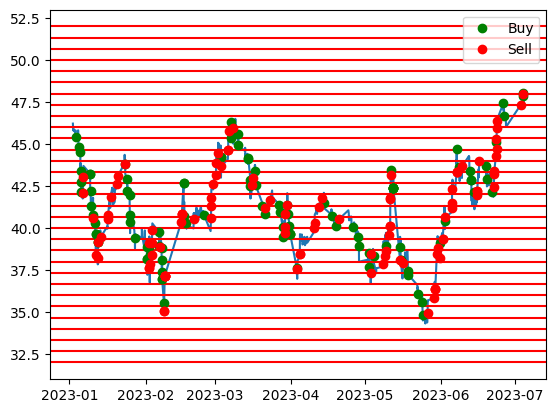

Buy: 2023-01-03 14:30:00+03:00
Buy: 2023-01-05 09:30:00+03:00
Buy: 2023-01-05 10:30:00+03:00
Buy: 2023-01-05 15:30:00+03:00
Buy: 2023-01-05 16:30:00+03:00
Buy: 2023-01-06 09:30:00+03:00
Sell: 2023-01-06 11:30:00+03:00
Sell: 2023-01-06 16:30:00+03:00
Buy: 2023-01-09 10:30:00+03:00
Buy: 2023-01-09 10:30:00+03:00
Buy: 2023-01-09 16:30:00+03:00
Buy: 2023-01-10 09:30:00+03:00
Sell: 2023-01-10 10:30:00+03:00
Buy: 2023-01-11 09:30:00+03:00
Buy: 2023-01-11 11:30:00+03:00
Buy: 2023-01-11 16:30:00+03:00
Buy: 2023-01-11 16:30:00+03:00
Sell: 2023-01-12 09:30:00+03:00
Buy: 2023-01-12 12:30:00+03:00
Buy: 2023-01-12 12:30:00+03:00
Sell: 2023-01-12 14:30:00+03:00
Sell: 2023-01-12 15:30:00+03:00
Sell: 2023-01-16 09:30:00+03:00
Sell: 2023-01-16 16:30:00+03:00
Sell: 2023-01-17 09:30:00+03:00
Sell: 2023-01-18 09:30:00+03:00
Sell: 2023-01-20 10:30:00+03:00
Sell: 2023-01-23 09:30:00+03:00
Sell: 2023-01-23 10:30:00+03:00
Buy: 2023-01-23 16:30:00+03:00
Buy: 2023-01-24 10:30:00+03:00
Buy: 2023-01-24 14:30:00+0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


class GridTradingBot:
    def __init__(self, symbol, start_date, end_date, num_levels, period, interval):
        self.symbol = symbol
        self.start_date = start_date
        self.end_date = end_date
        self.num_levels = num_levels
        self.period = period
        self.interval = interval
        self.data = None
        self.points = None
        self.buy_points = []
        self.sell_points = []
        self.buy_index = []
        self.sell_index = []
        self.transactions = []
        self.account = 100  # Fixed issue: added self prefix
   
   
    def fetch_data(self):
        self.data = yf.download(self.symbol, start=self.start_date, end=self.end_date, period=self.period, interval=self.interval)

    def calculate_points(self):
        start_price = 32
        end_price = 52
        self.points = np.flip(np.linspace(end_price, start_price, self.num_levels + 1))
        self.points_dict = {}
        self.trade_dict = {}

        for k in range(len(self.points)):  # Fixed issue: added self prefix
            self.points_dict[k] = False
            self.trade_dict[k] = None
           
        print("Points:", self.points)
    
    def check_the_points(self):
         for i in range(len(self.data) - 1):
            for j in range(1, len(self.points_dict)):
                if self.data.iloc[i].Close > self.points[j] and self.data.iloc[i + 1].Close < self.points[j] and self.points_dict[j] == False:
                    self.buy_index.append(i)  # Fixed issue: use i instead of i+1
                    self.buy_points.append(self.data.iloc[i + 1].Close)
                    self.points_dict[j] = True
                    self.trade_dict[j] = self.data.iloc[i + 1].Close
                    self.transactions.append(("Buy", self.data.index[i + 1]))

                elif self.data.iloc[i].Close < self.points[j] and self.data.iloc[i + 1].Close > self.points[j] and self.points_dict[j - 1] == True:
                    self.sell_index.append(i)  # Fixed issue: use i instead of i+1
                    self.sell_points.append(self.data.iloc[i + 1].Close)
                    self.points_dict[j - 1] = False
                    print(self.data.iloc[i + 1].Close, self.trade_dict[j - 1])
                    self.trade_dict[j] = None
                    self.transactions.append(("Sell", self.data.index[i + 1]))

    def plot_data(self):
        plt.plot(self.data.Close)
        for point in self.points:
            plt.axhline(y=point, color='r')
        plt.plot(self.data.index[self.buy_index], self.data.Close.iloc[self.buy_index], 'go', label='Buy')
        plt.plot(self.data.index[self.sell_index], self.data.Close.iloc[self.sell_index], 'ro', label='Sell')
        plt.legend()
        plt.show()
            
    def sort_transactions(self):
        sorted_transactions = sorted(self.transactions, key=lambda x: pd.to_datetime(x[1]))
        for transaction in sorted_transactions:
            print(transaction[0] + ":", transaction[1])


    def run(self):
        self.fetch_data()
        self.calculate_points()
        self.check_the_points()
        self.plot_data()
        self.sort_transactions()

# Create an instance of the GridTradingBot class and run it
bot = GridTradingBot("SAHOL.IS", start_date="2023-01-01", end_date="2023-07-05", num_levels=30, period="1d", interval="1h")
bot.run()


In [2]:
# Obtain the buy_prices and sell_prices lists
buy_points = np.array(bot.buy_points)
sell_points = np.array(bot.sell_points)
print("\nBuy Points:")
print(buy_points)
print("\nSell Points:")
print(sell_points)


Buy Points:
[45.18000031 44.54000092 43.65999985 42.75999832 42.13999939 41.75999832
 41.93999863 41.93999863 41.31999969 40.61999893 40.29999924 39.95999908
 38.40000153 38.40000153 37.84000015 37.84000015 43.22000122 42.18000031
 41.95999908 41.24000168 40.54000092 39.70000076 39.29999924 38.40000153
 37.22000122 37.22000122 38.61999893 36.75999832 36.75999832 39.
 38.63999939 38.08000183 37.38000107 36.88000107 35.54000092 35.54000092
 35.04000092 41.31999969 41.31999969 40.29999924 39.97999954 39.81999969
 43.         43.         45.72000122 45.29999924 45.08000183 44.58000183
 43.86000061 43.13999939 42.52000046 41.91999817 42.59999847 41.5
 41.22000122 40.61999893 41.29999924 40.34000015 39.86000061 39.29999924
 41.02000046 40.29999924 39.93999863 37.63999939 37.63999939 37.63999939
 37.29999924 41.31999969 40.52000046 39.95999908 39.90000153 39.27999878
 38.         37.79999924 37.31999969 37.77999878 38.63999939 42.65999985
 38.09999847 38.09999847 38.09999847 38.09999847 38.0

In [3]:
# Truncate buy_points array to match the length of sell_points
buy_points = buy_points[:len(sell_points)]

# Calculate the profits
profits = (sell_points - buy_points) / buy_points * 100

# Print the profits
print("\nProfits:")
print(profits)




Profits:
[ -5.13501478  -1.88594552  -4.53504249  -7.95135137  -7.07166489
  -5.50766123  -4.38722035  -2.81354398   1.16166395   4.3820843
   6.84864067   9.70971261  15.52083033   1.87499317   3.38266061
   4.38689176 -11.15224331  -7.6813695   -4.81410987  -2.32784399
  -1.52936047  -6.44836606  -5.49618292   5.05207956   8.38258686
   8.38258686   4.45365424   9.738852    10.93580153   9.48718144
  10.5072501   12.13234955   9.36329561  11.87634796  17.55767502
  19.0770923   21.97488745   4.88867491   7.59922414  11.86104884
  10.30515002  13.86238197   5.44186082   7.72092952   1.44356918
  -4.90065661  -2.97249356  -6.99865998  -3.69356796  -7.09317942
  -3.99812028  -1.14503713  -1.22064944  -8.28915332  -4.22125577
  -2.80649783  -2.90557091   0.89241599   4.06422204   6.97201458
   0.09751564  -5.40943014  -3.05457548   3.34750839   4.99468942
   5.52604109   7.56032105   1.06485632   3.06021187   5.60560993
   8.12029509  10.3360527    3.89473564   1.05820512  -5.14468967
 

In [4]:
#Calculate the cumulative profits:
cumulative_profits = []
cumulative_profit = 0

for profit in profits:
    cumulative_profit += profit
    cumulative_profits.append(cumulative_profit)

print("Cumulative Profits:")
print(cumulative_profits)


Cumulative Profits:
[-5.135014783429388, -7.020960305031417, -11.556002790501534, -19.507354157766343, -26.57901904955169, -32.08668027920881, -36.47390062455261, -39.28744460121911, -38.125780647246586, -33.74369635182598, -26.895055685618907, -17.185343080488003, -1.6645127480828474, 0.21048042221854346, 3.5931410303986295, 7.980032787053608, -3.172210523192657, -10.853580023015127, -15.667689893935442, -17.995533880593623, -19.524894345764608, -25.973260401416717, -31.46944332595783, -26.417363769654788, -18.034776908939406, -9.652190048224023, -5.198535806190661, 4.540316191954291, 15.476117718933262, 24.963299162367754, 35.47054925921605, 47.60289881209108, 56.96619442468929, 68.84254238175244, 86.40021740433042, 105.47730970776564, 127.45219715569186, 132.340872065379, 139.940096201002, 151.80114504588232, 162.10629506853866, 175.96867703757005, 181.4105378575419, 189.13146738038893, 190.57503656190778, 185.67437995397202, 182.70188639106183, 175.70322641252272, 172.0096584477689